In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [2]:
p_pheno = '/Users/harveyaa/Documents/masters/data/pheno_26-01-22.csv'
p_conn = '/Users/harveyaa/Documents/masters/data/connectomes_01-12-21.csv'

pheno = pd.read_csv(p_pheno,index_col=0)
conn = pd.read_csv(p_conn,index_col=0)

/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_46339/1203825045.py:4: DtypeWarning: Columns (7,8,12,13,14,19,20,24,27,31,42,43,44,49,51,59,60,62,64,65,68,101,121,163) have mixed types. Specify dtype option on import or set low_memory=False.
  pheno = pd.read_csv(p_pheno,index_col=0)


In [3]:
cases = ['SZ',
        'ASD',
        'BIP',
        'DEL22q11_2',
        'DUP22q11_2',
        'DEL16p11_2',
        'DUP16p11_2',
        'DEL1q21_1',
        'DUP1q21_1']

conf = ['AGE',
        'SEX',
        'SITE',
        'mean_conn',
        'FD_scrubbed']

In [4]:
# CLASSIFIERS FROM BENCHMARK 1
#rf = RandomForestClassifier(n_estimators=50,class_weight='balanced')
#lda = LDA() #can adjust priors for imbalanced data?
#knn = KNeighborsClassifier(n_neighbors=3) #not sure how to adjust for imbalanced data
#gauss = GaussianNB() #can adjust priors for imbalanced data?
#svc = SVC(C=100,class_weight='balanced')
#logit = LogisticRegression(C=100,class_weight='balanced',max_iter=5000) #this is L2 penalty

In [5]:
p_ids = '/Users/harveyaa/Documents/masters/neuropsych_mtl/datasets/cv_folds/hybrid'

clfs = {# Dadi et al. w/o anova & L1
        'LR':LogisticRegression(class_weight='balanced',max_iter=5000),
        'SVC':LinearSVC(class_weight='balanced',max_iter=5000),
        'Ridge':RidgeClassifier(class_weight = 'balanced'),
        'GNB':GaussianNB(), # from bench 1
        'RF':RandomForestClassifier(class_weight='balanced'), # from bench 1
        'kNN':KNeighborsClassifier(n_neighbors=1) # match dadi
        }

mean_acc_conf = {}
mean_acc_conn = {}
for clf in clfs:
        mean_acc_conf[clf] = []
        mean_acc_conn[clf] = []

all_fold_acc_lr_conn = {}
all_fold_acc_svc_conn = {}
all_fold_acc_ridge_conn = {}
all_fold_acc_gnb_conn = {}
all_fold_acc_rf_conn = {}
all_fold_acc_knn_conn = {}

for case in cases:
    print(case)
    # Load ids
    dataset_ids = pd.read_csv(os.path.join(p_ids,f"{case}.csv"),index_col=0)

    # Confound matrix
    df = pheno[pheno.index.isin(dataset_ids.index)]
    X = pd.get_dummies(df[conf],columns=['SEX','SITE'],drop_first=True)

    # Connectomes
    X_conn = conn[conn.index.isin(dataset_ids.index)]

    # Labels
    y = dataset_ids[case]

    acc_conf = {}
    acc_conn = {}
    for clf in clfs:
        acc_conf[clf] = []
        acc_conn[clf] = []
        
    for i in range(5):
        for clf in clfs:
            if f'fold_{i}' in dataset_ids.columns:
                # Test set ids for fold
                test_mask = (dataset_ids[f'fold_{i}'] == 1).to_numpy()

                # Train/test split
                X_train, X_test = X[~test_mask], X[test_mask]
                X_conn_train, X_conn_test = X_conn[~test_mask], X_conn[test_mask]
                y_train, y_test = y[~test_mask], y[test_mask]

                # Pred from confounds
                clfs[clf].fit(X_train,y_train)
                pred = clfs[clf].predict(X_test)
                acc_conf[clf].append(accuracy_score(y_test,pred))

                # Pred from connectomes
                clfs[clf].fit(X_conn_train,y_train)
                pred_conn = clfs[clf].predict(X_conn_test)
                conn_accuracy = accuracy_score(y_test,pred_conn)
                acc_conn[clf].append(conn_accuracy)

    all_fold_acc_lr_conn[case] = acc_conn['LR']
    all_fold_acc_svc_conn[case] = acc_conn['SVC']
    all_fold_acc_ridge_conn[case] = acc_conn['Ridge']
    all_fold_acc_gnb_conn[case] = acc_conn['GNB']
    all_fold_acc_rf_conn[case] = acc_conn['RF']
    all_fold_acc_knn_conn[case] = acc_conn['kNN']
    
    for clf in clfs:
        mean_acc_conf[clf].append(np.mean(acc_conf[clf]))
        mean_acc_conn[clf].append(np.mean(acc_conn[clf]))

SZ


/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


ASD


/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


BIP


/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


DEL22q11_2


/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


DUP22q11_2


/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


DEL16p11_2


/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


DUP16p11_2


/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


DEL1q21_1


/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


DUP1q21_1


/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/harveyaa/miniconda3/envs/fmri/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [6]:
results = {}
for clf in clfs:
    results[clf] = pd.DataFrame([mean_acc_conf[clf],mean_acc_conn[clf]],columns=cases,index=['conf','conn']).transpose()

In [36]:
pd.concat([results['LR'], results['SVC']],axis=1,keys=['LR','SVC'])
pd.concat(results.values(),keys=results.keys(),axis=1)

LR                 SVC               Ridge            \
                conf      conn      conf      conn      conf      conn   
SZ          0.512698  0.785714  0.538095  0.750794  0.519048  0.739683   
ASD         0.434534  0.592359  0.449565  0.578392  0.447415  0.563395   
BIP         0.524476  0.573150  0.531069  0.541532  0.531142  0.532368   
DEL22q11_2  0.557143  0.829048  0.626190  0.829524  0.599048  0.835238   
DUP22q11_2  0.301667  0.583333  0.446667  0.596667  0.261667  0.596667   
DEL16p11_2  0.575000  0.775000  0.625000  0.775000  0.600000  0.775000   
DUP16p11_2  0.367857  0.497381  0.428095  0.480000  0.362143  0.496667   
DEL1q21_1   0.474286  0.425714  0.520000  0.431429  0.480000  0.471429   
DUP1q21_1   0.457143  0.571429  0.400000  0.700000  0.400000  0.614286   

                 GNB                  RF                 kNN            
                conf      conn      conf      conn      conf      conn  
SZ          0.503175  0.647619  0.601587  0.661905  0.558730  0.638095  
ASD         0.426035  0.493651  0.499943  0.548273  0.494555  0.507550  
BIP         0.530593  0.588811  0.498628  0.507143  0.402451  0.607712  
DEL22q11_2  0.644286  0.637619  0.557143  0.692381  0.520476  0.540952  
DUP22q11_2  0.511667  0.620000  0.501667  0.575000  0.481667  0.546667  
DEL16p11_2  0.325000  0.700000  0.650000  0.700000  0.700000  0.750000  
DUP16p11_2  0.609286  0.676905  0.430000  0.461429  0.493333  0.660476  
DEL1q21_1   0.328571  0.534286  0.234286  0.340000  0.454286  0.471429  
DUP1q21_1   0.442857  0.442857  0.285714  0.557143  0.485714  0.542857

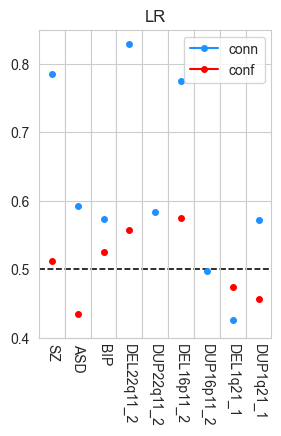

In [24]:
for clf in clfs:
    fig,ax = plt.subplots(1,len(cases),figsize=(3,4),sharey=True,sharex=True)
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.ylim(0,1)
    sns.set_style('whitegrid')

    for j,case in enumerate(cases):
        conf_acc = results[clf].loc[case,'conf']
        conn_acc = results[clf].loc[case,'conn']

        ax[j].plot(0,conn_acc,marker='o',color='dodgerblue',ms=4,markerfacecolor='dodgerblue',label='conn')
        ax[j].plot(0,conf_acc,marker='o',color='red',ms=4,markerfacecolor='red',label='conf')

        ax[j].set_xticklabels([])
        ax[j].set_xticks([])
        ax[j].set_xlim(-0.1,0.1)
        ax[j].set_ylim(0.4,0.85)

        ax[j].set_xlabel(case,rotation=270)

        lines = ax[j].get_ygridlines()
        b = lines[5]
        b.set_color('black')
        b.set_linewidth(1.15)
        b.set_linestyle('--')
        fig.subplots_adjust(wspace=0)

    ax[4].set_title(clf)
    plt.legend()
    break
#plt.tight_layout()
#plt.savefig('/home/harveyaa/Documents/masters/MTL/results/courtois_meeting/tasks_9/run1.png',dpi=300)

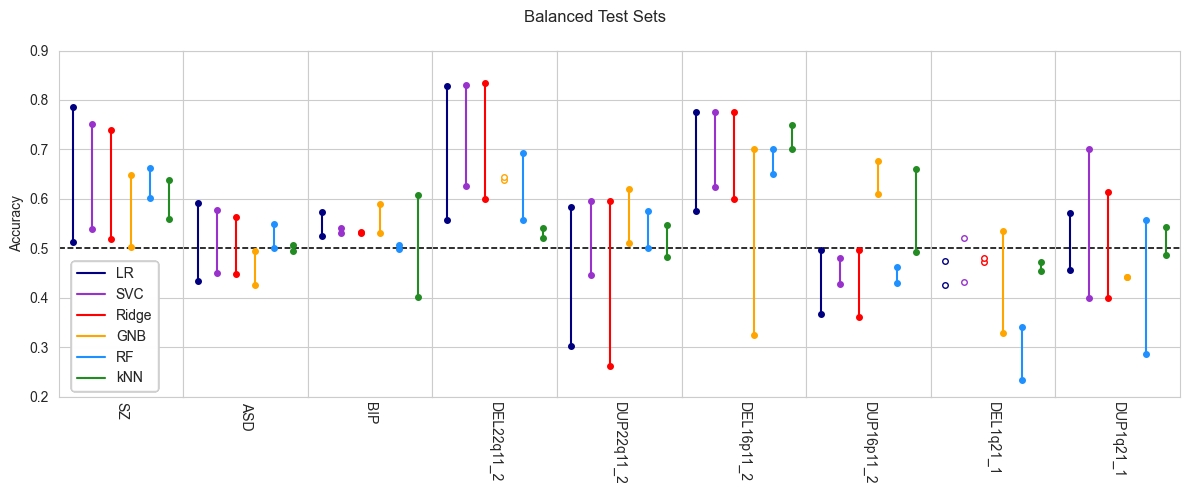

In [25]:
title = 'Balanced Test Sets'

fig,ax = plt.subplots(1,len(cases),figsize=(12,5),sharey=True,sharex=True)

plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
sns.set_style('whitegrid')
colors = ['navy','darkorchid','red','orange','dodgerblue','forestgreen']
for j,case in enumerate(cases):
    for i,clf in enumerate(clfs):
        conf_acc = results[clf].loc[case,'conf']
        conn_acc = results[clf].loc[case,'conn']

        if conf_acc > conn_acc:
            mfc = 'white'
            ls =''
        else:
            mfc = colors[i]
            ls = '-'
        ax[j].plot(i,conn_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
        ax[j].plot(i,conf_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
        ax[j].plot((i,i),(conf_acc,conn_acc),color=colors[i],ls=ls,label=clf)
        ax[j].set_xticklabels([])
        ax[j].set_xticks([])
        ax[j].set_xlim(-0.75,5.75)

        ax[j].set_xlabel(case,rotation=270)

        lines = ax[j].get_ygridlines()
        b = lines[5]
        b.set_color('black')
        b.set_linewidth(1.15)
        b.set_linestyle('--')

    handles, _ = ax[0].get_legend_handles_labels()
    labels = clfs.keys()

    ax[0].set_ylabel('Accuracy')
    fig.legend(handles, labels, loc=(0.06,0.21))
    plt.suptitle(title)
    plt.ylim(0.2,0.9)
    plt.tight_layout()
    plt.subplots_adjust(wspace=0)
    #plt.savefig(os.path.join(p_ids,'both_acc.png'),dpi=300)

In [11]:
df_lr = pd.DataFrame(all_fold_acc_lr_conn)
df_svc = pd.DataFrame(all_fold_acc_svc_conn)
df_ridge = pd.DataFrame(all_fold_acc_ridge_conn)
df_gnb = pd.DataFrame(all_fold_acc_gnb_conn)
df_knn = pd.DataFrame(all_fold_acc_knn_conn)

In [12]:
df_lr[df_lr.values < 0.55] = np.nan
df_lr

,SZ,ASD,BIP,DEL22q11_2,DUP22q11_2,DEL16p11_2,DUP16p11_2,DEL1q21_1,DUP1q21_1
0,0.793651,0.553191,NaN,0.866667,0.750000,0.625,0.600000,NaN,0.785714
1,0.793651,0.591398,NaN,0.800000,0.666667,0.875,NaN,NaN,NaN
2,0.801587,0.629032,NaN,0.821429,NaN,NaN,0.666667,NaN,NaN
3,0.785714,0.575269,0.678571,0.800000,0.666667,0.875,NaN,NaN,0.714286
4,0.753968,0.612903,0.653846,0.857143,NaN,1.000,NaN,NaN,NaN


In [15]:
df_svc[df_svc.values < 0.55] = np.nan
df_svc

,SZ,ASD,BIP,DEL22q11_2,DUP22q11_2,DEL16p11_2,DUP16p11_2,DEL1q21_1,DUP1q21_1
0,0.785714,NaN,NaN,0.833333,0.750000,0.625,NaN,NaN,0.785714
1,0.761905,0.569892,NaN,0.800000,0.666667,0.875,NaN,NaN,0.785714
2,0.698413,0.602151,NaN,0.821429,NaN,NaN,0.666667,NaN,NaN
3,0.746032,0.569892,0.642857,0.800000,0.666667,0.875,NaN,NaN,0.714286
4,0.761905,0.602151,0.576923,0.892857,NaN,1.000,NaN,NaN,0.714286


In [16]:
df_ridge[df_ridge.values < 0.55] = np.nan
df_ridge

,SZ,ASD,BIP,DEL22q11_2,DUP22q11_2,DEL16p11_2,DUP16p11_2,DEL1q21_1,DUP1q21_1
0,0.793651,NaN,NaN,0.900000,0.750000,0.750,NaN,NaN,0.714286
1,0.722222,NaN,NaN,0.800000,0.666667,0.875,NaN,NaN,0.714286
2,0.730159,0.602151,NaN,0.821429,NaN,NaN,0.666667,NaN,NaN
3,0.714286,NaN,0.714286,0.833333,0.666667,0.875,NaN,NaN,0.714286
4,0.738095,0.602151,0.576923,0.821429,NaN,1.000,NaN,NaN,0.571429


In [17]:
df_gnb[df_gnb.values < 0.55] = np.nan
df_gnb

,SZ,ASD,BIP,DEL22q11_2,DUP22q11_2,DEL16p11_2,DUP16p11_2,DEL1q21_1,DUP1q21_1
0,0.658730,NaN,NaN,0.633333,NaN,0.625,0.700000,NaN,NaN
1,0.650794,NaN,0.615385,0.600000,NaN,0.875,0.642857,0.571429,NaN
2,0.666667,NaN,0.636364,0.642857,0.6,0.625,0.666667,NaN,NaN
3,0.634921,NaN,NaN,0.633333,1.0,0.750,0.875000,0.700000,NaN
4,0.626984,NaN,0.692308,0.678571,NaN,0.625,NaN,NaN,NaN


In [18]:
df_knn[df_knn.values < 0.55] = np.nan
df_knn

,SZ,ASD,BIP,DEL22q11_2,DUP22q11_2,DEL16p11_2,DUP16p11_2,DEL1q21_1,DUP1q21_1
0,0.674603,NaN,0.600000,NaN,NaN,0.750,0.600000,NaN,0.571429
1,0.619048,NaN,0.576923,NaN,0.666667,0.625,0.785714,NaN,0.571429
2,0.619048,NaN,0.636364,NaN,NaN,0.750,0.666667,0.6,NaN
3,0.587302,NaN,0.571429,0.566667,NaN,0.625,NaN,NaN,0.571429
4,0.690476,NaN,0.653846,0.571429,0.666667,1.000,0.750000,NaN,0.571429
